#### Configuração do ambiente
O passo inicial é preparar o ambiente do Google Colab para que ele tenha acesso a todos os módulos e arquivos do nosso projeto. Para garantir a praticidade e o uso da versão mais atualizada do código, optamos por clonar o repositório diretamente do GitHub.


* **1. Clonagem do repositório:** utilizamos o comando `!git clone`. Este comando baixa uma cópia completa e privada do nosso projeto (`zerionkit`) para o ambiente de execução temporário do Colab. O acesso é feito de forma segura utilizando um *Personal Access Token (PAT)* do GitHub.

In [ ]:
!git clone https://github.com/petribrn/zerionkit.git

Cloning into 'zerionkit'...
remote: Enumerating objects: 288, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 288 (delta 18), reused 23 (delta 11), pack-reused 228 (from 1)
Receiving objects: 100% (288/288), 1.34 MiB | 4.28 MiB/s, done.
Resolving deltas: 100% (144/144), done.


* **2. Mudança de diretório:** este comando muda o diretório de trabalho atual para dentro da pasta do projeto clonado. Isso garante que quaisquer caminhos de arquivo relativos funcionem corretamente.


In [ ]:
%cd /content/zerionkit/

/content/zerionkit


* **3. Adição ao `sys.path` do python:** informa ao interpretador python onde encontrar nossos módulos customizados.


In [ ]:
import sys

project_path = '/content/zerionkit/'

sys.path.append(project_path)

* **4. Importações:** importamos toda as bibliotecas e classes necessárias para a execução do notebook.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from src.zerion_nn import ZerionNN
from src.layer import Layer
from src.data_handler import DataHandler
from src.loss import Loss

print("Módulos importados com sucesso!")

Módulos importados com sucesso!


####Carregamento e Preparação dos Dados
Utilizamos nossa classe `DataHandler` para carregar o dataset, dividi-lo em conjuntos de treino e validação, e realizar o pré-processamento necessário. O conjunto de dados de teste será carregado apenas na etapa final.

In [ ]:
training_data_handler = DataHandler(
        dataset_type='training',
        problem_type='binary_class',
        dataset_name='mushroom',
        y_target_columns='poisonous',
    )
training_inputs, training_y_targets = training_data_handler.processed_data

validation_data_handler = DataHandler(
        dataset_type='validation',
        problem_type='binary_class',
        dataset_name='mushroom',
        y_target_columns='poisonous',
    )
validation_inputs, validation_y_targets = validation_data_handler.processed_data

print("Dados carregados com sucesso!")

Dados carregados com sucesso!


####Definição e instanciação do modelo

Definimos a arquitetura da nossa rede neural (número de camadas, neurônios e funções de ativação) e outros hiperparâmetros como a taxa de aprendizado e o número de épocas.

In [ ]:
neural_network = ZerionNN(
        problem_type='binary_class',
        layers=[
            Layer(size=len(training_inputs[0]), activation='sigmoid'),
            Layer(size=4, activation='relu'),
            Layer(size=8, activation='relu'),
            Layer(size=len(training_y_targets.keys()), activation='sigmoid'),
        ],
        loss='binary_cross_entropy',
        learning_rate=0.01,
        epochs=100,
    )
print("Rede neural criada com sucesso")

Rede neural criada com sucesso


#### Treinamento do modelo
Treinamos o modelo apenas com o conjunto de dados de treino, utilizando o método `.train()`.

In [ ]:
metrics = neural_network.train(
        inputs=training_inputs,
        y_targets=training_y_targets,
    )

[Epoch 0] Error: 0.7360586103995927| Accuracy: 83.18907482208117%
[Epoch 1] Error: 0.38445551765325786| Accuracy: 90.44046932102327%


#### Desempenho do modelo
Analisamos o desempenho do modelo que acabamos de treinar. Primeiro, visualizamos a curva de aprendizado para garantir que o treinamento ocorreu de forma estável. Em seguida, avaliamos a performance do modelo nos conjuntos de validação e teste para medir sua capacidade de generalização em dados novos.


* **1. Gráfico da curva de aprendizado:** plotamos o erro e a acurácia do treinamento ao longo das épocas, mostrando como o modelo aprendeu.

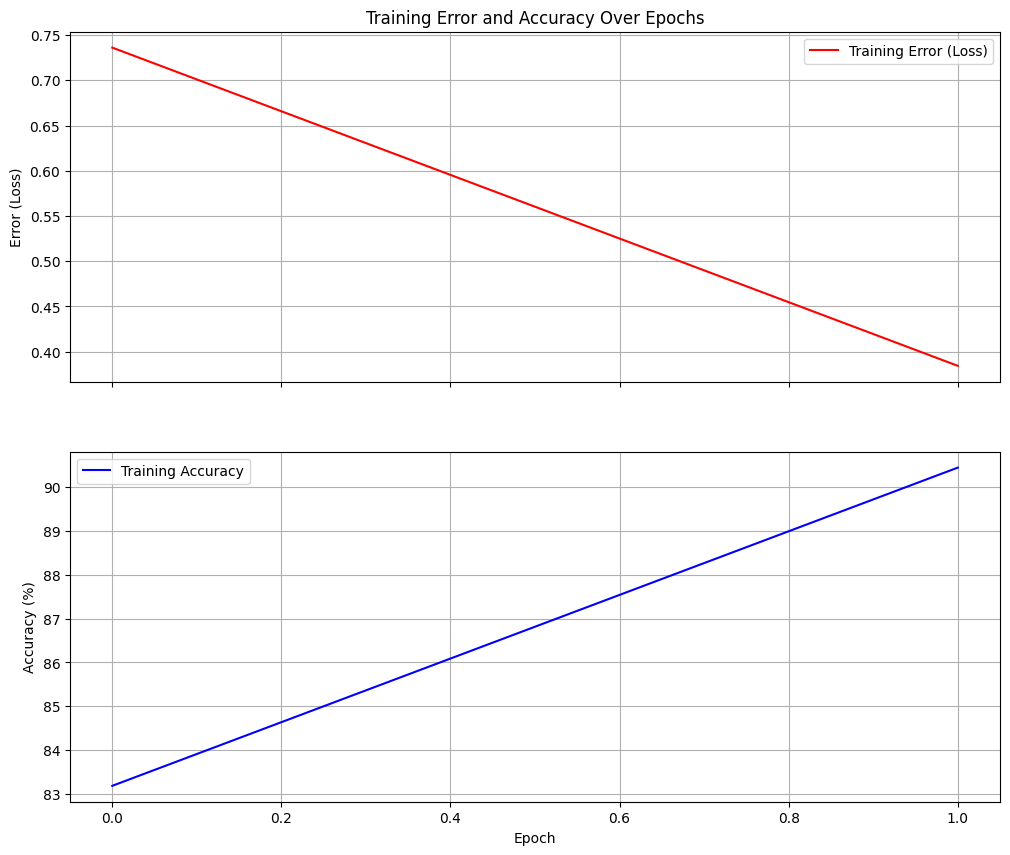

In [ ]:
errors = metrics['errors']
accuracies = metrics['accuracies']
epochs_range = range(len(errors))

# Criar uma figura com dois subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plotar Erro de Treinamento
ax1.plot(epochs_range, errors, 'r-', label='Training Error (Loss)')
ax1.set_ylabel('Error (Loss)')
ax1.set_title('Training Error and Accuracy Over Epochs')
ax1.grid(True)
ax1.legend()

# Plotar Acurácia de Treinamento
ax2.plot(epochs_range, accuracies, 'b-', label='Training Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.grid(True)
ax2.legend()

plt.show()

* **2. Avaliação nos dados de validação:** usamos o método `.evaluate()` para obter as métricas finais no conjunto de validação.



In [ ]:
neural_network.evaluate(
        inputs=validation_inputs,
        y_targets=validation_y_targets,
        y_scaler=validation_data_handler.y_scaler,
    )


--- Evaluation Results ---
Accuracy: 66.15384615384615%
Correct Predictions: 860/1300


{'accuracy': 66.15384615384615,
 'total_samples': 1300,
 'correct_predictions': 860}

* **3. Avaliação nos dados de teste:** carregamos e preparamos o conjunto de dados de teste. Também, usamos o método `.evaluate()` para obter as métricas finais no conjunto de teste.

In [ ]:
test_data_handler = DataHandler(
        dataset_type='test',
        problem_type='binary_class',
        dataset_name='mushroom',
        y_target_columns='poisonous',
    )
test_inputs, test_y_targets = test_data_handler.processed_data

neural_network.evaluate(
        inputs=test_inputs,
        y_targets=test_y_targets,
        y_scaler=test_data_handler.y_scaler,
    )


--- Evaluation Results ---
Accuracy: 53.169230769230765%
Correct Predictions: 864/1625


{'accuracy': 53.169230769230765,
 'total_samples': 1625,
 'correct_predictions': 864}